# Extracting upstream seqs from genbank files for 5 organisms

In [1]:
import Bio
from Bio import SeqIO, SeqFeature
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import genbank_utils as gu
import utils as u
import viz as v

In [2]:
# genbank files
gbFile_5G = 'data/genomes/5GB1c_sequence_20220411.gb'
gbFile_ecoli = 'data/genomes/ecoli_NC_000913.3.gb'
gbFile_cauto = 'data/genomes/cauto_sequence.gb'
gbFile_bsub = 'data/genomes/bsubtilis_AL009126.gbff'
gbFile_tmari = 'data/genomes/tmaritima3.gb'


# General Genome info
Basic counts of various gene and CDS features in the 5G and E. coli genome genbank files

In [3]:
def look_at_gb(file, org_name):
    gb = SeqIO.parse(file, "genbank").__next__()
    #gb_ecoli = SeqIO.parse(gbFile_ecoli, "genbank").__next__()

    print(f"\n___ {org_name} ____")
    print("Genome length:", len(gb.seq), "bps")
    print("num features:", len(gb.features))
    print("num CDS features:", len([x for x in gb.features if x.type=='CDS']))
    print("num gene features:", len([x for x in gb.features if x.type=='gene']))
    print("A:",gb.seq.count("A")/len(gb.seq))
    print("C:",gb.seq.count("C")/len(gb.seq))
    print("G:",gb.seq.count("G")/len(gb.seq))
    print("T:",gb.seq.count("T")/len(gb.seq))
    
    return gb


In [4]:
gb_5G = look_at_gb(gbFile_5G, "5G")
gb_ecoli = look_at_gb(gbFile_ecoli, "ecoli")
gb_bsub = look_at_gb(gbFile_bsub, "bsub")
gb_tmari = look_at_gb(gbFile_tmari, "tmari")
gb_cauto = look_at_gb(gbFile_cauto, "cauto")



___ 5G ____
Genome length: 4998879 bps
num features: 8478
num CDS features: 4177
num gene features: 4234
A: 0.256196639286528
C: 0.24354360247567505
G: 0.24364442508010295
T: 0.25661533315769397

___ ecoli ____
Genome length: 4641652 bps
num features: 9900
num CDS features: 4357
num gene features: 4566
A: 0.24619295026856816
C: 0.2542394388894299
G: 0.25366765970391575
T: 0.2458999511380862

___ bsub ____
Genome length: 4215606 bps
num features: 9074
num CDS features: 4325
num gene features: 4536
A: 0.28182733395862897
C: 0.2180668686779552
G: 0.21707721262376037
T: 0.2830285847396555

___ tmari ____
Genome length: 1869612 bps
num features: 3905
num CDS features: 1891
num gene features: 1946
A: 0.2696297413581
C: 0.2278601121516122
G: 0.23462729165195773
T: 0.2678828548383301

___ cauto ____
Genome length: 4352205 bps
num features: 8274
num CDS features: 3992
num gene features: 4093
A: 0.34708268567312434
C: 0.1527595781908251
G: 0.1581593697907153
T: 0.3419983663453353


In [5]:
# # print some example feature info from each genome    
for x in gb_cauto.features[:5]:
    print(x)
    

type: source
location: [0:4352205](+)
qualifiers:
    Key: collection_date, Value: ['1993']
    Key: country, Value: ['Belgium']
    Key: culture_collection, Value: ['DSM:10061']
    Key: db_xref, Value: ['taxon:1341692']
    Key: host, Value: ['rabbit']
    Key: isolation_source, Value: ['Rabbit feces']
    Key: mol_type, Value: ['genomic DNA']
    Key: organism, Value: ['Clostridium autoethanogenum DSM 10061']
    Key: strain, Value: ['DSM 10061']
    Key: type_material, Value: ['type strain of Clostridium autoethanogenum']

type: gene
location: [78:285](+)
qualifiers:
    Key: locus_tag, Value: ['CAETHG_RS00005']
    Key: old_locus_tag, Value: ['CAETHG_0001']

type: CDS
location: [78:285](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: inference, Value: ['COORDINATES: similar to AA sequence:RefSeq:WP_014355090.1']
    Key: locus_tag, Value: ['CAETHG_RS00005']
    Key: note, Value: ['Derived by automated computational analysis using gene prediction method: Protein Homology

In [6]:
from collections import Counter

In [7]:
gbs = {
    '5G':gb_5G,
    'ecoli':gb_ecoli,
    'bsub':gb_bsub,
    'tmari':gb_tmari,
    'cauto':gb_cauto
}

for org in gbs:
    gb_rec = gbs[org]
    types = set([x.type for x in gb_rec.features if x.type!='CDS'])
    c = Counter([x.type for x in gb_rec.features])
    cds = [x for x in gb_rec.features if (x.type=='gene' and 'locus_tag' in x.qualifiers)]

    print(org)
    print(c)
    print(len(cds))
    print()

5G
Counter({'gene': 4234, 'CDS': 4177, 'tRNA': 44, 'rRNA': 9, 'regulatory': 5, 'repeat_region': 4, 'ncRNA': 3, 'source': 1, 'tmRNA': 1})
4234

ecoli
Counter({'gene': 4566, 'CDS': 4357, 'repeat_region': 697, 'tRNA': 86, 'ncRNA': 72, 'mobile_element': 49, 'misc_feature': 48, 'rRNA': 22, 'source': 1, 'misc_recomb': 1, 'rep_origin': 1})
4566

bsub
Counter({'gene': 4536, 'CDS': 4325, 'misc_RNA': 93, 'tRNA': 86, 'rRNA': 30, 'ncRNA': 2, 'source': 1, 'misc_feature': 1})
4536

tmari
Counter({'gene': 1946, 'CDS': 1891, 'tRNA': 46, 'repeat_region': 8, 'misc_binding': 4, 'rRNA': 3, 'ncRNA': 3, 'misc_feature': 2, 'source': 1, 'tmRNA': 1})
1946

cauto
Counter({'gene': 4093, 'CDS': 3992, 'tRNA': 68, 'regulatory': 49, 'misc_binding': 32, 'rRNA': 27, 'ncRNA': 5, 'misc_feature': 3, 'repeat_region': 3, 'source': 1, 'tmRNA': 1})
4093



## CDS processing
Extract CDS (coding sequence) features and their coordinates, +/- strand info

In [8]:
def get_all_features_and_genome(gb_file):
    '''
    Given a genbank file, load its features and exclude types of features
    we don't want (in config/gbfeats2exclude.txt)
    '''
    # get features
    TYPE_IDX=5
    feats = gu.get_feature_tuples_from_genbank(gb_file)
    gbfeats2exclude = gu.get_gbfeats2exclude()

    feats_filt = [x for x in feats if (x[TYPE_IDX] not in gbfeats2exclude)]
    
    # get genome
    genome = gu.get_genome_from_genbank(gb_file)
    
    return feats_filt,genome

In [9]:
# print example CDS entries extracted into a list
cds_5G,genome_5G = get_all_features_and_genome(gbFile_5G)
print(cds_5G[:10])
print()
cds_ecoli,genome_ecoli = get_all_features_and_genome(gbFile_ecoli)
print(cds_ecoli[:10])
print()
cds_bsub,genome_bsub = get_all_features_and_genome(gbFile_bsub)
print(cds_bsub[:10])
print()
cds_tmari,genome_tmari = get_all_features_and_genome(gbFile_tmari)
print(cds_tmari[:10])
print()
cds_cauto,genome_cauto = get_all_features_and_genome(gbFile_cauto)
print(cds_cauto[:10])


[(0, 1317, 1, 'EQU24_RS00005', 'dnaA', 'CDS'), (1502, 2603, 1, 'EQU24_RS00010', 'dnaN', 'CDS'), (3060, 4140, 1, 'EQU24_RS00015', 'recF', 'CDS'), (4185, 6600, 1, 'EQU24_RS00020', 'gyrB', 'CDS'), (7350, 7734, 1, 'EQU24_RS00035', '', 'CDS'), (7818, 9075, 1, 'EQU24_RS00040', '', 'CDS'), (9071, 10241, 1, 'EQU24_RS00045', '', 'CDS'), (10240, 13306, 1, 'EQU24_RS00050', '', 'CDS'), (13298, 13604, 1, 'EQU24_RS00055', '', 'CDS'), (13842, 16413, 1, 'EQU24_RS00060', '', 'CDS')]

[(189, 255, 1, 'b0001', 'thrL', 'CDS'), (336, 2799, 1, 'b0002', 'thrA', 'CDS'), (2800, 3733, 1, 'b0003', 'thrB', 'CDS'), (3733, 5020, 1, 'b0004', 'thrC', 'CDS'), (5233, 5530, 1, 'b0005', 'yaaX', 'CDS'), (5682, 6459, -1, 'b0006', 'yaaA', 'CDS'), (6528, 7959, -1, 'b0007', 'yaaJ', 'CDS'), (8237, 9191, 1, 'b0008', 'talB', 'CDS'), (9305, 9893, 1, 'b0009', 'mog', 'CDS'), (9927, 10494, -1, 'b0010', 'satP', 'CDS')]

[(409, 1750, 1, 'BSU_00010', 'dnaA', 'CDS'), (1938, 3075, 1, 'BSU_00020', 'dnaN', 'CDS'), (3205, 3421, 1, 'BSU_00030

In [10]:
print("5G feats:",len(cds_5G),"genome len:",len(genome_5G))
print("ecoli:",len(cds_ecoli),"genome len:",len(genome_ecoli))
print("bsub:",len(cds_bsub),"genome len:",len(genome_bsub))
print("tmari:",len(cds_tmari),"genome len:",len(genome_tmari))
print("cauto:",len(cds_cauto),"genome len:",len(genome_cauto))



5G feats: 4234 genome len: 4998879
ecoli: 4537 genome len: 4641652
bsub: 4443 genome len: 4215606
tmari: 1944 genome len: 1869612
cauto: 4093 genome len: 4352205


### Distribution of CDS lengths

In [11]:
cds_5G[0]

(0, 1317, 1, 'EQU24_RS00005', 'dnaA', 'CDS')

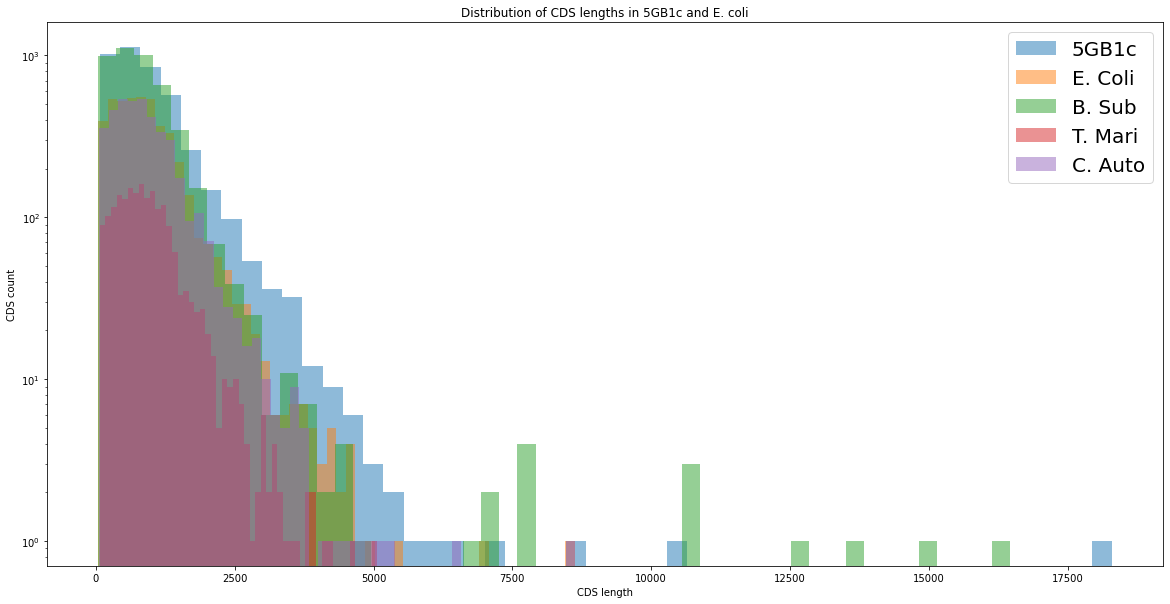

In [12]:
cds_5G_lengths = [e-s for (s,e,_,_,_,_) in cds_5G]
cds_ecoli_lengths = [e-s for (s,e,_,_,_,_) in cds_ecoli]
cds_bsub_lengths = [e-s for (s,e,_,_,_,_) in cds_bsub]
cds_tmari_lengths = [e-s for (s,e,_,_,_,_) in cds_tmari]
cds_cauto_lengths = [e-s for (s,e,_,_,_,_) in cds_cauto]

plt.figure(figsize=(20,10))
plt.hist(cds_5G_lengths, alpha = 0.5, bins=50, label='5GB1c')
plt.hist(cds_ecoli_lengths, alpha = 0.5, bins=50, label='E. Coli')
plt.hist(cds_bsub_lengths, alpha = 0.5, bins=50, label='B. Sub')
plt.hist(cds_tmari_lengths, alpha = 0.5, bins=50, label='T. Mari')
plt.hist(cds_cauto_lengths, alpha = 0.5, bins=50, label='C. Auto')
plt.yscale('log')
plt.xlabel("CDS length")
plt.ylabel("CDS count")
plt.title("Distribution of CDS lengths in 5GB1c and E. coli")
plt.legend(fontsize = 20)
plt.show()

### Distribution of CDSs across genome
Exploring the distribution of CDS annotations through the length of the genome. Are some areas more densely packed than others?

First viz type: create a histogram of annotation counts across the genome by position. Taller bars indicate more CDS annotations occur in that window.

In [13]:
# get the middle coordinate of each feature and make a histogram

cds_mean_coord_5G = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_5G]
cds_mean_coord_ecoli = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_ecoli]
cds_mean_coord_bsub = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_bsub]
cds_mean_coord_tmari = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_tmari]
cds_mean_coord_cauto = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_cauto]

Second viz type: The skinny bars in the histrogram are a little awkward and hard to see. This time, instead of a histogram, I make a heatmap where the darker color indicates more genes fall within this window along the genome. 

In [14]:
# Use numpy's histogram function to get bin the genes and 
# get the edge values for the heatmap

counts_5G,edges_5G = np.histogram(cds_mean_coord_5G, 
                                  bins=np.arange(0,5000000,10000))

counts_ecoli,edges_ecoli = np.histogram(cds_mean_coord_ecoli, 
                                        bins=np.arange(0,5000000,10000))

counts_bsub,edges_bsub = np.histogram(cds_mean_coord_bsub, 
                                        bins=np.arange(0,5000000,10000))

counts_tmari,edges_tmari = np.histogram(cds_mean_coord_tmari, 
                                        bins=np.arange(0,5000000,10000))

counts_cauto,edges_cauto = np.histogram(cds_mean_coord_cauto, 
                                        bins=np.arange(0,5000000,10000))

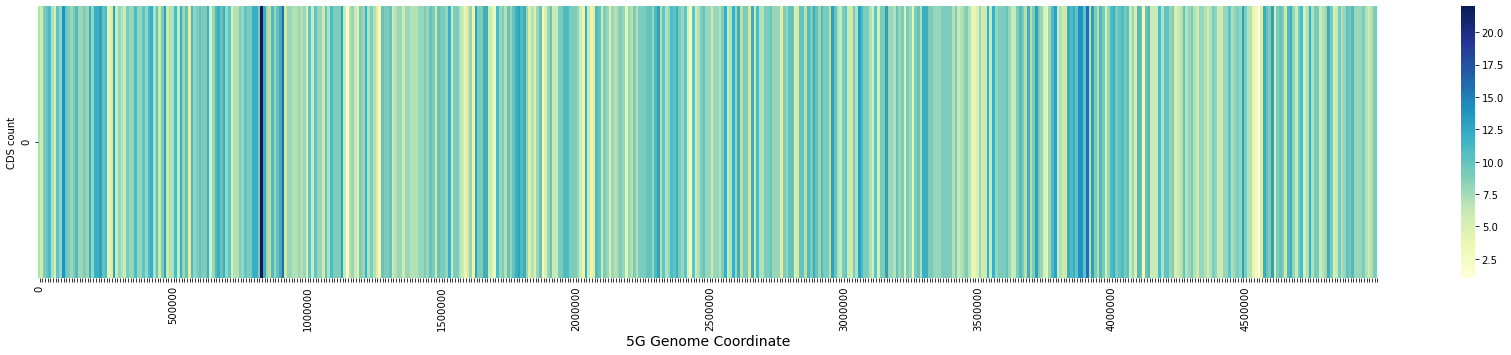

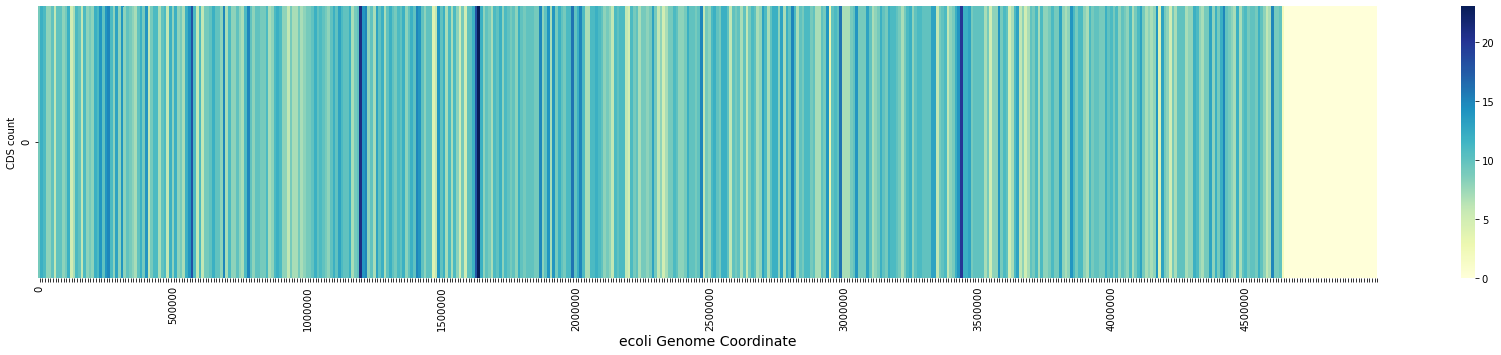

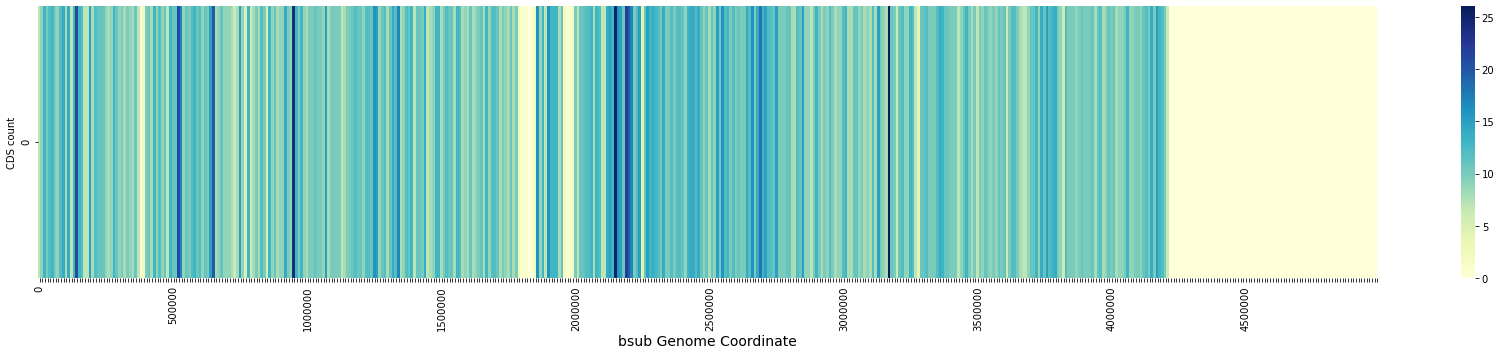

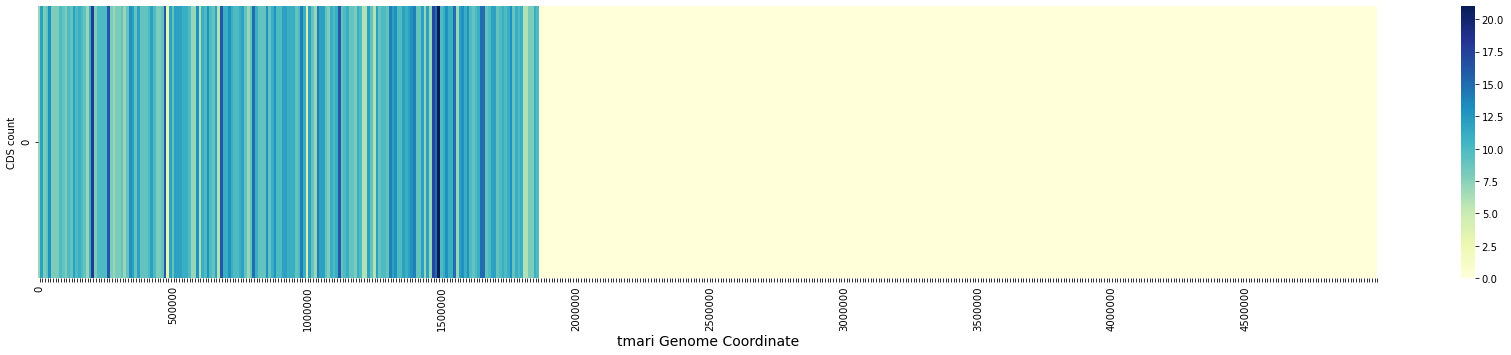

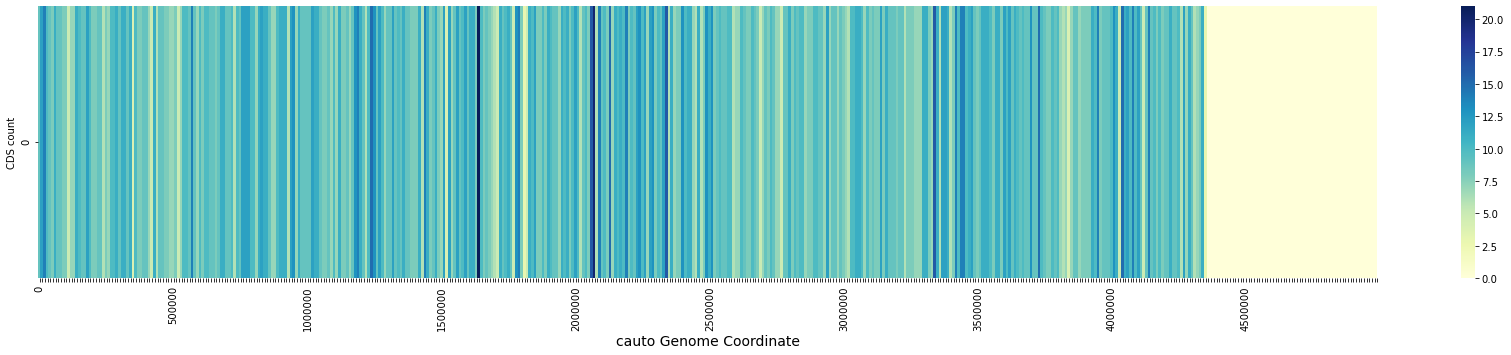

In [15]:
def genome_cds_heatmap(org,counts,edges):
    # 5G heatmap
    plt.figure(figsize=(30,5))
    #sns.set(font_scale=2)
    g = sns.heatmap([counts], xticklabels=edges, cmap="YlGnBu")

    # reduce number of ticks on the x-axis
    for i,label in enumerate(g.xaxis.get_ticklabels()):
        if (i % 50) != 0:
            label.set_visible(False)

    plt.xlabel(f"{org} Genome Coordinate", fontsize=14)
    plt.ylabel("CDS count")
    plt.show()

genome_cds_heatmap("5G",counts_5G,edges_5G)
genome_cds_heatmap("ecoli",counts_ecoli,edges_ecoli)
genome_cds_heatmap("bsub",counts_bsub,edges_bsub)
genome_cds_heatmap("tmari",counts_tmari,edges_tmari)
genome_cds_heatmap("cauto",counts_cauto,edges_cauto)

# Write out locus tags of all loci for each org

There is a script in the repository `promoter-id-from-rnaseq` to extract 300bp upstream regions from all locus tags. In order to use it, write out some temp files of `locus_id, False` so the script can run:

In [16]:
def write_out_locus_tags(cds_list,outf):
    with open(outf,'w') as f:
        f.write(f'locus_tag\tdummy\n')
        for (_,_,_,locus_tag,_,_) in cds_list:
            f.write(f'{locus_tag}\tFalse\n')

In [17]:
write_out_locus_tags(cds_5G,'organism_loci/5G_loci.txt')
write_out_locus_tags(cds_ecoli,'organism_loci/ecoli_loci.txt')
write_out_locus_tags(cds_bsub,'organism_loci/bsub_loci.txt')
write_out_locus_tags(cds_tmari,'organism_loci/tmari_loci.txt')
write_out_locus_tags(cds_cauto,'organism_loci/cauto_loci.txt')

# Use promoter files to create XY df
Use the `extract_upstream_regions.py` script from [promoter-id-from-rnaseq](https://github.com/erinhwilson/promoter-id-from-rnaseq/blob/master/extract_upstream_regions.py) to generate upstream promoter fasta files with the following commands:

* `python extract_upstream_regions.py organism_loci/5G_loci.txt data/5GB1c_sequence_20220411.gb organism_loci/ -t -a`
* `python extract_upstream_regions.py organism_loci/ecoli_loci.txt data/ecoli_NC_000913.3.gb organism_loci/ -t -a`
* `python extract_upstream_regions.py organism_loci/bsub_loci.txt data/bsubtilis_AL009126.gbff organism_loci/ -t -a`
* `python extract_upstream_regions.py organism_loci/tmari_loci.txt data/tmaritima3.gb organism_loci/ -t -a`
* `python extract_upstream_regions.py organism_loci/cauto_loci.txt data/cauto_sequence.gb organism_loci/ -t -a`

Use these outputs and load into XY files for future prediction tasks

In [18]:
def load_promoter_seqs(filename):
    '''
    Load fasta file of promoters into ID, desc, and seq. It expects
    each fasta header to be divided by "|" with in the format:
    LOCUS_TAG|GENE_SYMBOL|PRODUCT
    '''
    proms = []
    with open(filename,'r') as f:
        for line in f:
            if line.startswith(">"):
                full_header = line.strip()[1:].strip()
                locus_tag = full_header.split('|')[0]
            else:
                seq = line.strip().upper()
                proms.append((locus_tag,full_header,seq))
                
    return proms

def parse_loc2info(locus_tag,header,seq):
    gene = header.split('|')[1]
    prod = header.split('|')[2]
    
    #return (locus_tag,{'gene':gene,'product':prod,'seq':seq})
    return [locus_tag,gene,prod,seq]

def get_org_info_from_promoter_fasta(filename):
    proms = load_promoter_seqs(filename)
    loc2info = [parse_loc2info(x,y,z) for (x,y,z) in proms]
    return loc2info

In [19]:
loc2info_ecoli = get_org_info_from_promoter_fasta('organism_loci/ecoli_loci_upstream_regions_w300_min20.fa')
loc2info_ecoli[:5]

[['b0001',
  'thrL',
  'thr operon leader peptide',
  'ACAACAACGCCTGGGGCTTTTAGAGCAACGAGACACGGCAATGTTGCACCGTTTGCTGCATGATATTGAAAAAAATATCACCAAATAAAAAACGCCTTAGTAAGTATTTTTCAGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATC'],
 ['b0002',
  'thrA',
  'fused aspartate kinase/homoserine dehydrogenase 1',
  'CTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAAC'],
 ['b0003',
  'thrB',
  'homoserine kinase',
  'CTGTCACAACTCGACGATCTCTTTGCCGCGCGCGTGGCGAAGGCCCGTGATGAAGGAAAAGTTTTGCGCTATGTTGGCAATATTGATGAAGATGGCGTCTGCCGCGTGAAGATTGCCGAAGTGGATGGTAATGATCCGCTGTTCAAAGTGAAAAATGGCGAAAACGCCCTGGCCTTCTATAGCCACTATTATCAGCCGCTGCCGTTGGTAC

In [20]:
all_org_df = pd.DataFrame()
orgs = ['5G','ecoli','bsub','tmari','cauto']

for i,org in enumerate(orgs):
    org_info = get_org_info_from_promoter_fasta(f'organism_loci/{org}_loci_upstream_regions_w300_min20.fa')
    org_df = pd.DataFrame(org_info,columns=['locus_tag','gene','product','upstream_region'])
    org_df['org'] = org
    org_df['id'] = i
    
    all_org_df = pd.concat([all_org_df,org_df])
    
all_org_df

,locus_tag,gene,product,upstream_region,org,id
0,EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA,ACTGTTAGCTTGGCACGGCCCTTGGCTCTGCGGGCGTTAAGGACTT...,5G,0
1,EQU24_RS00010,dnaN,DNA polymerase III subunit beta,GTGGACGCGATCACACCACGGTTATTAATGCTTGTAAACGCATTGC...,5G,0
2,EQU24_RS00015,recF,DNA replication/repair protein RecF,TTGCGAAGAGGGGCGGTTTCTCGTCCGACAGGCGTCGGCGGCAAGG...,5G,0
3,EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,ATTGTTAGTTCTATGTTTAAAGCTTGCGCAAGTACAATTATTGTCG...,5G,0
4,EQU24_RS00035,,hypothetical protein,GTATAAACCATGAAAGTCAGCCTATTTCGAAGATACCGACACCCTA...,5G,0
...,...,...,...,...,...,...
4088,CAETHG_RS20445,,4Fe-4S double cluster binding domain-containin...,ATTTGTTTCCTTGTTATCCATCAATTACCTCCTAAATTAATAATTT...,cauto,4
4089,CAETHG_RS20450,,cytosine permease,TTGTATATTATATTCCAACATAAGTATGTCCTCCTTTATAATATGG...,cauto,4
4090,CAETHG_RS20455,codA,cytosine deaminase,ATGGTATTTGGACCTATTTTTGGAATTATGATAACAGATTACTATT...,cauto,4
4091,CAETHG_RS20460,,immunity 22 family protein,AGATGAATATGATGTTATAAGAAAACAATCAGAGGTGCTGTATTCC...,cauto,4


In [21]:
# there are two seqs (1 from 5g, 1 from bsub) that are too short... ignore for now
[len(x) for x in all_org_df[all_org_df['upstream_region'].str.len() != 300]['upstream_region'].values]

[169, 216]

In [22]:
# filter to only sequences with 300bp
final_df = all_org_df[all_org_df['upstream_region'].str.len() == 300]
final_df

,locus_tag,gene,product,upstream_region,org,id
0,EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA,ACTGTTAGCTTGGCACGGCCCTTGGCTCTGCGGGCGTTAAGGACTT...,5G,0
1,EQU24_RS00010,dnaN,DNA polymerase III subunit beta,GTGGACGCGATCACACCACGGTTATTAATGCTTGTAAACGCATTGC...,5G,0
2,EQU24_RS00015,recF,DNA replication/repair protein RecF,TTGCGAAGAGGGGCGGTTTCTCGTCCGACAGGCGTCGGCGGCAAGG...,5G,0
3,EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,ATTGTTAGTTCTATGTTTAAAGCTTGCGCAAGTACAATTATTGTCG...,5G,0
4,EQU24_RS00035,,hypothetical protein,GTATAAACCATGAAAGTCAGCCTATTTCGAAGATACCGACACCCTA...,5G,0
...,...,...,...,...,...,...
4088,CAETHG_RS20445,,4Fe-4S double cluster binding domain-containin...,ATTTGTTTCCTTGTTATCCATCAATTACCTCCTAAATTAATAATTT...,cauto,4
4089,CAETHG_RS20450,,cytosine permease,TTGTATATTATATTCCAACATAAGTATGTCCTCCTTTATAATATGG...,cauto,4
4090,CAETHG_RS20455,codA,cytosine deaminase,ATGGTATTTGGACCTATTTTTGGAATTATGATAACAGATTACTATT...,cauto,4
4091,CAETHG_RS20460,,immunity 22 family protein,AGATGAATATGATGTTATAAGAAAACAATCAGAGGTGCTGTATTCC...,cauto,4


In [23]:
final_df['shuffled_seq'] = final_df['upstream_region'].apply(lambda x: u.shuffle_seq(x))
final_df

/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,locus_tag,gene,product,upstream_region,org,id,shuffled_seq
0,EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA,ACTGTTAGCTTGGCACGGCCCTTGGCTCTGCGGGCGTTAAGGACTT...,5G,0,GTCTTCTGAGTGTTATAAGCTGGAGTTCTTCAGTGTTGTGTACCCA...
1,EQU24_RS00010,dnaN,DNA polymerase III subunit beta,GTGGACGCGATCACACCACGGTTATTAATGCTTGTAAACGCATTGC...,5G,0,TTGATGTGTATATTGGACCTAACTACGCAAACCTTTGTCCTTGTAA...
2,EQU24_RS00015,recF,DNA replication/repair protein RecF,TTGCGAAGAGGGGCGGTTTCTCGTCCGACAGGCGTCGGCGGCAAGG...,5G,0,TAGGCAGACTTGGTAAGGTTCGTATTAGATGTCAAAGTAAGAGGTA...
3,EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,ATTGTTAGTTCTATGTTTAAAGCTTGCGCAAGTACAATTATTGTCG...,5G,0,TTAACCTCGGGGTCTTTCAGATGAGCCAGAGTGGATGATAAGCTAG...
4,EQU24_RS00035,,hypothetical protein,GTATAAACCATGAAAGTCAGCCTATTTCGAAGATACCGACACCCTA...,5G,0,GGGACAGAACCTATGAGTCCTCTAGGATTAATGGACTTTGCCCCGA...
...,...,...,...,...,...,...,...
4088,CAETHG_RS20445,,4Fe-4S double cluster binding domain-containin...,ATTTGTTTCCTTGTTATCCATCAATTACCTCCTAAATTAATAATTT...,cauto,4,AACTTGAATCACCAATTACAGTATTTAATATATAACAAATGTGAAT...
4089,CAETHG_RS20450,,cytosine permease,TTGTATATTATATTCCAACATAAGTATGTCCTCCTTTATAATATGG...,cauto,4,GGATTTCCTAACATTGGTCATGTATATTAATAATCAATCTTAATAT...
4090,CAETHG_RS20455,codA,cytosine deaminase,ATGGTATTTGGACCTATTTTTGGAATTATGATAACAGATTACTATT...,cauto,4,TAGATATTTTGGTAAGATGATGTTTGCATATCGATATGTAGCAATT...
4091,CAETHG_RS20460,,immunity 22 family protein,AGATGAATATGATGTTATAAGAAAACAATCAGAGGTGCTGTATTCC...,cauto,4,TAGTTGTAATAGATCATACCAAAATTTTACAATAACAGCGTATAAA...


In [24]:
final_df.to_csv("data/5org_upstream_regions.tsv",sep='\t',index=False)

In [25]:
final_df['org'].value_counts()

ecoli    4537
bsub     4442
5G       4233
cauto    4093
tmari    1944
Name: org, dtype: int64

# Save some stratified train/test splits

In [26]:
from sklearn.model_selection import StratifiedKFold 

In [27]:
skf = StratifiedKFold(n_splits=5)


_____Split 0____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


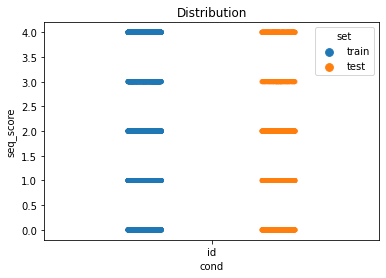


_____Split 1____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


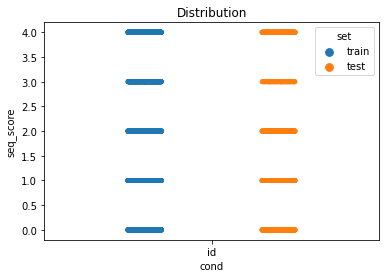


_____Split 2____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


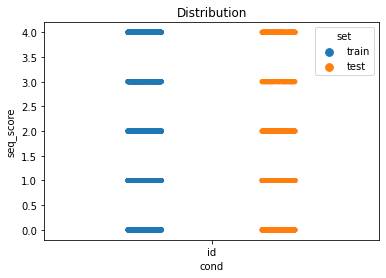


_____Split 3____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


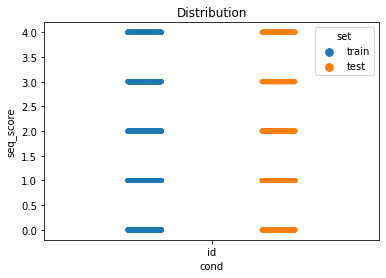


_____Split 4____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


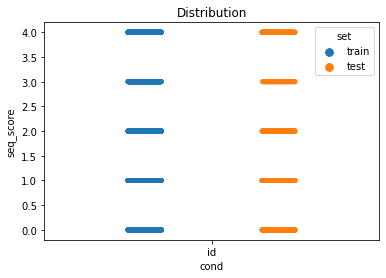

In [28]:
for i, (train_idxs, test_idxs) in enumerate(skf.split(final_df, final_df['id'])):
    print(f"_____Split {i}____")
    train_df = final_df.iloc[train_idxs]
    test_df = final_df.iloc[test_idxs]
    
    score_col = "id"

    v.view_train_test_dist(train_df, test_df,[score_col],id_col='locus_tag')
    
    print("")
    
    split_dfs = {
        'train':train_df,
        'test':test_df
    }
    
    train_df.to_csv(f'data/5org_ups_cls_splits/cv{i}_train.tsv',index=False,sep='\t')
    test_df.to_csv(f'data/5org_ups_cls_splits/cv{i}_test.tsv',index=False,sep='\t')

# Extract CDS sequences
While we're here with lists of CDSs, let's extract those into an easy file too

In [29]:
cds_5G[:5]

[(0, 1317, 1, 'EQU24_RS00005', 'dnaA', 'CDS'),
 (1502, 2603, 1, 'EQU24_RS00010', 'dnaN', 'CDS'),
 (3060, 4140, 1, 'EQU24_RS00015', 'recF', 'CDS'),
 (4185, 6600, 1, 'EQU24_RS00020', 'gyrB', 'CDS'),
 (7350, 7734, 1, 'EQU24_RS00035', '', 'CDS')]

In [30]:
def get_cds_lists(org_name,cds_list,genome,min_seq_len=300):
    '''
    Given a list of CDS tuples and a genome, extract all
    the CDS sequences, with at least min_seq_len bp
    '''
    
    data = []
    for (s,e,strand,lt,gene,typee) in cds_list:
        cds_len = e-s
        extended = False
        # check extension for positive strand
        if strand == 1:
            # if length of CDS is < 300, get at least 300
            if cds_len < min_seq_len:
                print(f"found short cds {lt} on +, with length {cds_len}")
                print(f"extending by {min_seq_len-cds_len}")
                e = e + min_seq_len-cds_len
                extended = True
            seq = genome[s:e]
        
        if strand==-1:
            # if length of CDS is < 300, get at least 300
            if cds_len < min_seq_len:
                print(f"found short cds {lt} on -, with length {cds_len}")
                print(f"extending by {min_seq_len-cds_len}")
                s = s - (min_seq_len-cds_len)
                extended = True
            
            seq = genome[s:e]
            seq = seq.reverse_complement()
        
        seq = ''.join(seq)
        
        data.append([org_name,lt,seq,strand,typee,extended])
        
    return pd.DataFrame(data,columns=['org_name','locus_tag','CDS_seq','strand','type','extended?'])
        

In [31]:
cds_data_5G = get_cds_lists('5G',cds_5G,genome_5G)

found short cds EQU24_RS00070 on +, with length 216
extending by 84
found short cds EQU24_RS00160 on -, with length 297
extending by 3
found short cds EQU24_RS00165 on -, with length 297
extending by 3
found short cds EQU24_RS00175 on -, with length 279
extending by 21
found short cds EQU24_RS00190 on -, with length 228
extending by 72
found short cds EQU24_RS00215 on +, with length 210
extending by 90
found short cds EQU24_RS00230 on +, with length 222
extending by 78
found short cds EQU24_RS00250 on +, with length 291
extending by 9
found short cds EQU24_RS00255 on +, with length 291
extending by 9
found short cds EQU24_RS00260 on +, with length 291
extending by 9
found short cds EQU24_RS00320 on +, with length 258
extending by 42
found short cds EQU24_RS00370 on +, with length 192
extending by 108
found short cds EQU24_RS00455 on +, with length 213
extending by 87
found short cds EQU24_RS00505 on +, with length 234
extending by 66
found short cds EQU24_RS00525 on +, with length 77
e

found short cds EQU24_RS07865 on -, with length 273
extending by 27
found short cds EQU24_RS07915 on +, with length 264
extending by 36
found short cds EQU24_RS07950 on +, with length 198
extending by 102
found short cds EQU24_RS07955 on +, with length 92
extending by 208
found short cds EQU24_RS07960 on +, with length 77
extending by 223
found short cds EQU24_RS07965 on +, with length 76
extending by 224
found short cds EQU24_RS08025 on +, with length 282
extending by 18
found short cds EQU24_RS22325 on -, with length 174
extending by 126
found short cds EQU24_RS08050 on +, with length 192
extending by 108
found short cds EQU24_RS22330 on +, with length 147
extending by 153
found short cds EQU24_RS08070 on -, with length 228
extending by 72
found short cds EQU24_RS08095 on -, with length 234
extending by 66
found short cds EQU24_RS22335 on +, with length 162
extending by 138
found short cds EQU24_RS08100 on -, with length 180
extending by 120
found short cds EQU24_RS08125 on +, with l

found short cds EQU24_RS13510 on -, with length 282
extending by 18
found short cds EQU24_RS13520 on -, with length 273
extending by 27
found short cds EQU24_RS13560 on -, with length 288
extending by 12
found short cds EQU24_RS22430 on +, with length 249
extending by 51
found short cds EQU24_RS13640 on +, with length 258
extending by 42
found short cds EQU24_RS13725 on +, with length 195
extending by 105
found short cds EQU24_RS13735 on -, with length 216
extending by 84
found short cds EQU24_RS13785 on +, with length 273
extending by 27
found short cds EQU24_RS22435 on -, with length 165
extending by 135
found short cds EQU24_RS13860 on +, with length 270
extending by 30
found short cds EQU24_RS13885 on +, with length 198
extending by 102
found short cds EQU24_RS13900 on +, with length 261
extending by 39
found short cds EQU24_RS13975 on -, with length 77
extending by 223
found short cds EQU24_RS22445 on -, with length 174
extending by 126
found short cds EQU24_RS14005 on +, with len

found short cds EQU24_RS19525 on +, with length 279
extending by 21
found short cds EQU24_RS19540 on -, with length 282
extending by 18
found short cds EQU24_RS19570 on -, with length 228
extending by 72
found short cds EQU24_RS22580 on +, with length 168
extending by 132
found short cds EQU24_RS19635 on -, with length 267
extending by 33
found short cds EQU24_RS22585 on +, with length 147
extending by 153
found short cds EQU24_RS19745 on -, with length 279
extending by 21
found short cds EQU24_RS22590 on -, with length 144
extending by 156
found short cds EQU24_RS22595 on +, with length 141
extending by 159
found short cds EQU24_RS22600 on -, with length 138
extending by 162
found short cds EQU24_RS22605 on +, with length 144
extending by 156
found short cds EQU24_RS19995 on +, with length 234
extending by 66
found short cds EQU24_RS20005 on +, with length 291
extending by 9
found short cds EQU24_RS20010 on +, with length 270
extending by 30
found short cds EQU24_RS20015 on +, with le

In [32]:
print(min([len(x) for x in cds_data_5G['CDS_seq']]))
max([len(x) for x in cds_data_5G['CDS_seq']])

300


18306

(0.0, 5000.0)

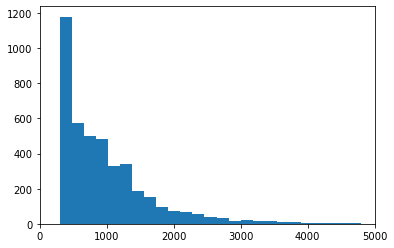

In [33]:
plt.hist([len(x) for x in cds_data_5G['CDS_seq']],bins=100)
plt.xlim(0,5000)

In [34]:
cds_data_ecoli = get_cds_lists('ecoli',cds_ecoli,genome_ecoli)
cds_data_bsub = get_cds_lists('bsub',cds_bsub,genome_bsub)
cds_data_tmari = get_cds_lists('tmari',cds_tmari,genome_tmari)
cds_data_cauto = get_cds_lists('cauto',cds_cauto,genome_cauto)

found short cds b0001 on +, with length 66
extending by 234
found short cds b0005 on +, with length 297
extending by 3
found short cds b0018 on -, with length 210
extending by 90
found short cds b4412 on -, with length 153
extending by 147
found short cds b4413 on +, with length 55
extending by 245
found short cds b0022 on -, with length 276
extending by 24
found short cds b0023 on -, with length 264
extending by 36
found short cds b0024 on +, with length 219
extending by 81
found short cds b0044 on +, with length 288
extending by 12
found short cds b0057 on +, with length 159
extending by 141
found short cds b4577 on +, with length 227
extending by 73
found short cds b4662 on +, with length 132
extending by 168
found short cds b0075 on -, with length 87
extending by 213
found short cds b4726 on -, with length 45
extending by 255
found short cds b0101 on -, with length 198
extending by 102
found short cds b4727 on +, with length 45
extending by 255
found short cds b4728 on +, with leng

extending by 36
found short cds b1375 on -, with length 234
extending by 66
found short cds b4744 on -, with length 114
extending by 186
found short cds b4638 on -, with length 51
extending by 249
found short cds b4427 on +, with length 109
extending by 191
found short cds b4529 on +, with length 267
extending by 33
found short cds b1382 on +, with length 186
extending by 114
found short cds b1389 on +, with length 288
extending by 12
found short cds b4674 on -, with length 66
extending by 234
found short cds b4597 on -, with length 64
extending by 236
found short cds b1419 on +, with length 174
extending by 126
found short cds b4428 on -, with length 150
extending by 150
found short cds b1420 on -, with length 168
extending by 132
found short cds b4429 on +, with length 56
extending by 244
found short cds b1426 on +, with length 225
extending by 75
found short cds b1436 on -, with length 231
extending by 69
found short cds b4532 on +, with length 177
extending by 123
found short cds b

found short cds b4546 on -, with length 219
extending by 81
found short cds b2415 on +, with length 258
extending by 42
found short cds b2444 on +, with length 246
extending by 54
found short cds b2456 on -, with length 288
extending by 12
found short cds b2457 on -, with length 294
extending by 6
found short cds b4606 on -, with length 60
extending by 240
found short cds b4547 on +, with length 201
extending by 99
found short cds b2504 on +, with length 192
extending by 108
found short cds b2510 on -, with length 216
extending by 84
found short cds b2524 on -, with length 201
extending by 99
found short cds b4706 on -, with length 66
extending by 234
found short cds b4441 on -, with length 184
extending by 116
found short cds b2562 on +, with length 261
extending by 39
found short cds b4687 on -, with length 81
extending by 219
found short cds b4608 on +, with length 77
extending by 223
found short cds b4725 on -, with length 156
extending by 144
found short cds b2588 on -, with lengt

found short cds b4650 on +, with length 252
extending by 48
found short cds b4554 on -, with length 210
extending by 90
found short cds b3610 on -, with length 252
extending by 48
found short cds b3636 on -, with length 168
extending by 132
found short cds b3637 on -, with length 237
extending by 63
found short cds b3649 on +, with length 276
extending by 24
found short cds b3658 on +, with length 95
extending by 205
found short cds b4555 on +, with length 294
extending by 6
found short cds b3670 on -, with length 291
extending by 9
found short cds b3672 on -, with length 99
extending by 201
found short cds b4616 on -, with length 140
extending by 160
found short cds b4616 on -, with length 73
extending by 227
found short cds b4618 on +, with length 90
extending by 210
found short cds b4757 on +, with length 81
extending by 219
found short cds b3703 on +, with length 141
extending by 159
found short cds b4557 on +, with length 258
extending by 42
found short cds b3707 on +, with length

extending by 21
found short cds BSU_02380 on +, with length 276
extending by 24
found short cds BSU_02530 on +, with length 162
extending by 138
found short cds BSU_02585 on -, with length 135
extending by 165
found short cds BSU_02619 on +, with length 177
extending by 123
found short cds BSU_02630 on +, with length 213
extending by 87
found short cds BSU_02785 on -, with length 132
extending by 168
found short cds BSU_03359 on +, with length 186
extending by 114
found short cds BSU_03385 on +, with length 198
extending by 102
found short cds BSU_03500 on +, with length 141
extending by 159
found short cds BSU_03569 on -, with length 168
extending by 132
found short cds BSU_03651 on +, with length 228
extending by 72
found short cds BSU_03690 on -, with length 222
extending by 78
found short cds BSU_03780 on +, with length 123
extending by 177
found short cds BSU_03788 on -, with length 90
extending by 210
found short cds BSU_03789 on -, with length 114
extending by 186
found short cd

found short cds BSU_13509 on +, with length 156
extending by 144
found short cds BSU_13510 on +, with length 177
extending by 123
found short cds BSU_13545 on +, with length 126
extending by 174
found short cds BSU_13640 on +, with length 258
extending by 42
found short cds BSU_13789 on +, with length 228
extending by 72
found short cds BSU_13799 on +, with length 252
extending by 48
found short cds BSU_13800 on +, with length 291
extending by 9
found short cds BSU_13810 on -, with length 186
extending by 114
found short cds BSU_13819 on +, with length 195
extending by 105
found short cds BSU_13900 on +, with length 267
extending by 33
found short cds BSU_13920 on +, with length 240
extending by 60
found short cds BSU_14009 on -, with length 162
extending by 138
found short cds BSU_14100 on +, with length 240
extending by 60
found short cds BSU_14120 on +, with length 198
extending by 102
found short cds BSU_14200 on +, with length 246
extending by 54
found short cds BSU_14310 on +, wi

extending by 93
found short cds BSU_23329 on -, with length 255
extending by 45
found short cds BSU_23330 on -, with length 288
extending by 12
found short cds BSU_23340 on -, with length 204
extending by 96
found short cds BSU_23349 on +, with length 117
extending by 183
found short cds BSU_23350 on +, with length 213
extending by 87
found short cds BSU_23519 on -, with length 228
extending by 72
found short cds BSU_23540 on -, with length 216
extending by 84
found short cds BSU_23616 on +, with length 123
extending by 177
found short cds BSU_23630 on -, with length 225
extending by 75
found short cds BSU_23650 on -, with length 240
extending by 60
found short cds BSU_23720 on +, with length 207
extending by 93
found short cds BSU_23836 on -, with length 123
extending by 177
found short cds BSU_23837 on -, with length 33
extending by 267
found short cds BSU_23880 on +, with length 288
extending by 12
found short cds BSU_24110 on +, with length 237
extending by 63
found short cds BSU_2

found short cds BSU_34210 on +, with length 219
extending by 81
found short cds BSU_34399 on +, with length 192
extending by 108
found short cds BSU_34420 on -, with length 93
extending by 207
found short cds BSU_tRNA_81 on -, with length 76
extending by 224
found short cds BSU_34729 on +, with length 210
extending by 90
found short cds BSU_34740 on -, with length 258
extending by 42
found short cds BSU_35110 on -, with length 198
extending by 102
found short cds BSU_35140 on +, with length 231
extending by 69
found short cds BSU_35180 on -, with length 231
extending by 69
found short cds BSU_35239 on -, with length 117
extending by 183
found short cds BSU_35370 on -, with length 225
extending by 75
found short cds BSU_35430 on -, with length 267
extending by 33
found short cds BSU_35460 on -, with length 297
extending by 3
found short cds BSU_35609 on -, with length 150
extending by 150
found short cds BSU_35678 on +, with length 219
extending by 81
found short cds BSU_35679 on -, wit

found short cds Tmari_0388 on -, with length 162
extending by 138
found short cds Tmari_R0020 on -, with length 71
extending by 229
found short cds Tmari_R0021 on +, with length 73
extending by 227
found short cds Tmari_R0022 on +, with length 73
extending by 227
found short cds Tmari_R0023 on +, with length 73
extending by 227
found short cds Tmari_R0024 on +, with length 84
extending by 216
found short cds Tmari_0448 on +, with length 150
extending by 150
found short cds Tmari_R0025 on +, with length 73
extending by 227
found short cds Tmari_0449 on +, with length 198
extending by 102
found short cds Tmari_R0027 on -, with length 86
extending by 214
found short cds Tmari_0476 on -, with length 231
extending by 69
found short cds Tmari_R0028 on -, with length 72
extending by 228
found short cds Tmari_R0029 on -, with length 84
extending by 216
found short cds Tmari_R0030 on -, with length 73
extending by 227
found short cds Tmari_0483 on -, with length 285
extending by 15
found short 

found short cds CAETHG_RS03430 on +, with length 138
extending by 162
found short cds CAETHG_RS03435 on +, with length 159
extending by 141
found short cds CAETHG_RS03440 on +, with length 147
extending by 153
found short cds CAETHG_RS03645 on -, with length 222
extending by 78
found short cds CAETHG_RS03755 on -, with length 231
extending by 69
found short cds CAETHG_RS03805 on -, with length 186
extending by 114
found short cds CAETHG_RS03815 on -, with length 213
extending by 87
found short cds CAETHG_RS03820 on -, with length 213
extending by 87
found short cds CAETHG_RS03825 on -, with length 228
extending by 72
found short cds CAETHG_RS03865 on -, with length 165
extending by 135
found short cds CAETHG_RS03895 on -, with length 129
extending by 171
found short cds CAETHG_RS03915 on +, with length 195
extending by 105
found short cds CAETHG_RS03945 on +, with length 255
extending by 45
found short cds CAETHG_RS04025 on -, with length 117
extending by 183
found short cds CAETHG_RS0

extending by 34
found short cds CAETHG_RS11175 on +, with length 288
extending by 12
found short cds CAETHG_RS11180 on +, with length 258
extending by 42
found short cds CAETHG_RS11205 on +, with length 186
extending by 114
found short cds CAETHG_RS11210 on +, with length 189
extending by 111
found short cds CAETHG_RS11245 on +, with length 117
extending by 183
found short cds CAETHG_RS11250 on +, with length 76
extending by 224
found short cds CAETHG_RS11315 on +, with length 117
extending by 183
found short cds CAETHG_RS11320 on +, with length 76
extending by 224
found short cds CAETHG_RS11395 on +, with length 117
extending by 183
found short cds CAETHG_RS11405 on +, with length 74
extending by 226
found short cds CAETHG_RS11425 on +, with length 213
extending by 87
found short cds CAETHG_RS11455 on +, with length 204
extending by 96
found short cds CAETHG_RS11460 on +, with length 174
extending by 126
found short cds CAETHG_RS11495 on -, with length 246
extending by 54
found short 

In [35]:
for cds_df in [cds_data_5G, cds_data_ecoli, cds_data_bsub, cds_data_tmari,cds_data_cauto]:
    print(cds_df['extended?'].value_counts())

False    3675
True      559
Name: extended?, dtype: int64
False    3880
True      657
Name: extended?, dtype: int64
False    3663
True      780
Name: extended?, dtype: int64
False    1723
True      221
Name: extended?, dtype: int64
False    3561
True      532
Name: extended?, dtype: int64


In [36]:
all_cds_df = pd.concat([cds_data_5G, cds_data_ecoli, cds_data_bsub, cds_data_tmari,cds_data_cauto])
all_cds_df

,org_name,locus_tag,CDS_seq,strand,type,extended?
0,5G,EQU24_RS00005,ATGAGTGCACTCTGGAACAACTGTCTCGCTAAACTTGAAAATGAAA...,1,CDS,False
1,5G,EQU24_RS00010,ATGAAATATATTATTAATAGAGAACAGCTATTGGTTCCATTGCAGC...,1,CDS,False
2,5G,EQU24_RS00015,ATGAGTTTACAAAAGCTCGACATTTTTAATGTTAGAAATATTCGGC...,1,CDS,False
3,5G,EQU24_RS00020,ATGAGCGAAAATATTAAGCAGTACGATAGTACGAATATTCAGGTGC...,1,CDS,False
4,5G,EQU24_RS00035,ATGTCGACGCCCTTCAAAACAGCCTTAGTCATTTTTCTCGTGATCC...,1,CDS,False
...,...,...,...,...,...,...
4088,cauto,CAETHG_RS20445,ATGTTGGAATATAATATACAAAAAATATTGAATAATTTTATGATAG...,-1,CDS,False
4089,cauto,CAETHG_RS20450,ATGGATAACAAGGAAACAAATGAAAAAGTACATAAGGAATATGCTG...,1,CDS,False
4090,cauto,CAETHG_RS20455,ATGTTAATAAAAAATGTAAGACTTAGAAATAAAGATGGAATATATG...,1,CDS,False
4091,cauto,CAETHG_RS20460,ATGGAGTATGAAGGAATAGTATCTATATGGCTGGCAAAATGTGAAG...,1,CDS,False


In [37]:
all_cds_df[all_cds_df['extended?']==True]

,org_name,locus_tag,CDS_seq,strand,type,extended?
11,5G,EQU24_RS00070,ATGGGCATCAGCGTTACGCAATTAGTCATCATCATGGTCATCGTGA...,1,CDS,True
29,5G,EQU24_RS00160,ATGAAAACATTATCGACTTCACTGCTTGCATTGGCTTTGACTGCCG...,-1,CDS,True
30,5G,EQU24_RS00165,ATGAAAACATTATCTATTTCACTGCTTGCATTGGCTTTGACTGCCG...,-1,CDS,True
32,5G,EQU24_RS00175,TTGCTGGATCCCATTGCATCGGAAACACTCTATCCGGTGTTGGCCG...,-1,CDS,True
35,5G,EQU24_RS00190,TTGCCTGTAGAGGGAAGCGATGAACTCAAACAGACCAACGAAATTG...,-1,CDS,True
...,...,...,...,...,...,...
4073,cauto,CAETHG_RS20370,ATGAATTCTCATGGAAATAAGAAAGAAAAACAAGGAACTCATAATC...,-1,CDS,True
4083,cauto,CAETHG_RS20420,GGTGTTCCAGCAGAGTTAATCCATATAAGCTACGGCATTGAAGACA...,-1,CDS,True
4084,cauto,CAETHG_RS20425,ATGAGTAAGAAAAATTCTTCTAGTAAAAATTACAGTAATACACAAT...,-1,CDS,True
4085,cauto,CAETHG_RS20430,ATGGATAACAATAAAAATAGGATGAAAGATAGGCCTAAGTCTAATG...,-1,CDS,True


In [38]:
# add org ids
org2id = dict([(org,i) for i,org in enumerate(orgs)])

all_cds_df['org_id'] = all_cds_df['org_name'].apply(lambda x: org2id[x])
all_cds_df

,org_name,locus_tag,CDS_seq,strand,type,extended?,org_id
0,5G,EQU24_RS00005,ATGAGTGCACTCTGGAACAACTGTCTCGCTAAACTTGAAAATGAAA...,1,CDS,False,0
1,5G,EQU24_RS00010,ATGAAATATATTATTAATAGAGAACAGCTATTGGTTCCATTGCAGC...,1,CDS,False,0
2,5G,EQU24_RS00015,ATGAGTTTACAAAAGCTCGACATTTTTAATGTTAGAAATATTCGGC...,1,CDS,False,0
3,5G,EQU24_RS00020,ATGAGCGAAAATATTAAGCAGTACGATAGTACGAATATTCAGGTGC...,1,CDS,False,0
4,5G,EQU24_RS00035,ATGTCGACGCCCTTCAAAACAGCCTTAGTCATTTTTCTCGTGATCC...,1,CDS,False,0
...,...,...,...,...,...,...,...
4088,cauto,CAETHG_RS20445,ATGTTGGAATATAATATACAAAAAATATTGAATAATTTTATGATAG...,-1,CDS,False,4
4089,cauto,CAETHG_RS20450,ATGGATAACAAGGAAACAAATGAAAAAGTACATAAGGAATATGCTG...,1,CDS,False,4
4090,cauto,CAETHG_RS20455,ATGTTAATAAAAAATGTAAGACTTAGAAATAAAGATGGAATATATG...,1,CDS,False,4
4091,cauto,CAETHG_RS20460,ATGGAGTATGAAGGAATAGTATCTATATGGCTGGCAAAATGTGAAG...,1,CDS,False,4


In [39]:
all_cds_df['shuffled_seq'] = all_cds_df['CDS_seq'].apply(lambda x: u.shuffle_seq(x))

In [40]:
# save as is
all_cds_df.to_csv('data/5org_cds_regions.tsv',sep='\t',index=False)

## Now save a version that only has 300bp seqs, but if the seq is long enough, split into multiple examples

In [41]:
all_300bp_cds_df = pd.DataFrame()
all_300bp_cds_df

""


In [42]:
for i,row in all_cds_df.iterrows():
    if i % 1000 == 0:
        print(f"row {i} of {all_cds_df.shape[0]}")
    seq = row['CDS_seq']
    cds_len = len(seq)
    
    seq_chunks = int(np.floor(cds_len/300))
    
    #print(row['locus_tag'],seq_chunks)
    
    start = 0
    for j in range(seq_chunks):
        end = start + 300
        subseq = seq[start:end]
        new_row = row.copy()
        new_row['CDS_seq'] = subseq
        new_row['shuffled_seq'] = u.shuffle_seq(subseq)
        new_row['chunk_id'] = j
        all_300bp_cds_df = all_300bp_cds_df.append(new_row)
        #print(new_row)
        start = end
        
    

row 0 of 19251
row 1000 of 19251
row 2000 of 19251
row 3000 of 19251
row 4000 of 19251
row 0 of 19251
row 1000 of 19251
row 2000 of 19251
row 3000 of 19251
row 4000 of 19251
row 0 of 19251
row 1000 of 19251
row 2000 of 19251
row 3000 of 19251
row 4000 of 19251
row 0 of 19251
row 1000 of 19251
row 0 of 19251
row 1000 of 19251
row 2000 of 19251
row 3000 of 19251
row 4000 of 19251


In [43]:
all_300bp_cds_df

,CDS_seq,chunk_id,extended?,locus_tag,org_id,org_name,shuffled_seq,strand,type
0,ATGAGTGCACTCTGGAACAACTGTCTCGCTAAACTTGAAAATGAAA...,0.0,0.0,EQU24_RS00005,0.0,5G,CATTGCAGCGGAGTTAAAGGACACTGCCCTGTAGTACAGTCACCCG...,1.0,CDS
0,AACTTTCTTAATAGAGCATTCATTTTCGATAACTTTGTCGAAGGTA...,1.0,0.0,EQU24_RS00005,0.0,5G,AACTTTAATATATTCCAATCTATCTCACGCTAAGGGGGAGAGGGAT...,1.0,CDS
0,GATACATTGCTGATTGACGATATTCAATTCTTTGCCGGCAAGGAAC...,2.0,0.0,EQU24_RS00005,0.0,5G,TTTATCTACGCCTAGTCAACCCCAACGACTAACTTCCTGGGGGGCT...,1.0,CDS
0,CCTTCGAATGTACGAGATCTCGAAGGCGCATTACGACGAGTTATTG...,3.0,0.0,EQU24_RS00005,0.0,5G,CAGCAGTGATAAAAGCATATCAGAGAGCACCTGGTCGGTGTTTCGC...,1.0,CDS
1,ATGAAATATATTATTAATAGAGAACAGCTATTGGTTCCATTGCAGC...,0.0,0.0,EQU24_RS00010,0.0,5G,CCCCACAGAATAGGAACATTATTTAGCCATATTTAATATCATTCCG...,1.0,CDS
...,...,...,...,...,...,...,...,...,...
4090,ATGTTAATAAAAAATGTAAGACTTAGAAATAAAGATGGAATATATG...,0.0,0.0,CAETHG_RS20455,4.0,cauto,TACCCGTTGAATACGAACCGTATTTCGTTTCACGAAAAGAGGAACA...,1.0,CDS
4090,CTTAAATGGCAGATAGCAAATGGAATACAGTATGTAAGAACACATG...,1.0,0.0,CAETHG_RS20455,4.0,cauto,AAATTAATTGCTAACTTTACAATGGCTTAATAATTAAGAGGGGAAG...,1.0,CDS
4090,GATAAACTGGTTGATGTCCACTGTGATGAAATTGATGATGAGCAGT...,2.0,0.0,CAETHG_RS20455,4.0,cauto,AACTTCGTTCGACCAGGGAATAACAAGTATACGAGTAAGTTTGTAG...,1.0,CDS
4090,GTATGTTTTGGACACGATGATATATGTGATCCATGGTATCCAATGG...,3.0,0.0,CAETHG_RS20455,4.0,cauto,GTTTTCAAGGATAACCCTTTTAATGATATAAGGGACGAGGAATACT...,1.0,CDS


In [44]:
print(min([len(x) for x in all_300bp_cds_df['CDS_seq']]))
max([len(x) for x in all_300bp_cds_df['CDS_seq']])

300


300

In [45]:
all_300bp_cds_df['org_name'].value_counts()

ecoli    12304
5G       12127
bsub     11162
cauto    10890
tmari     5280
Name: org_name, dtype: int64

(array([    0.,     0.,     0.,     0.,     0., 51763.,     0.,     0.,
            0.,     0.]),
 array([299.5, 299.6, 299.7, 299.8, 299.9, 300. , 300.1, 300.2, 300.3,
        300.4, 300.5]),
 <BarContainer object of 10 artists>)

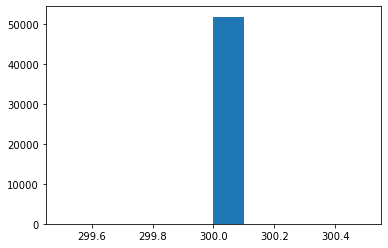

In [46]:
plt.hist([len(x) for x in all_300bp_cds_df['CDS_seq'].values])


In [47]:
# Save this 300bp df
all_300bp_cds_df.to_csv("data/5org_cds_regions_300bp.tsv",sep='\t',index=False)

### Save some stratified splits for the CDSs too

_____Split 0____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


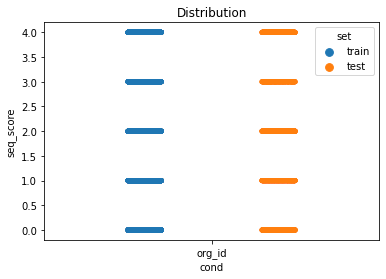


_____Split 1____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


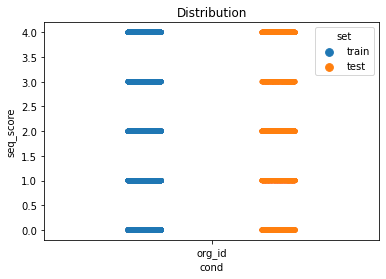


_____Split 2____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


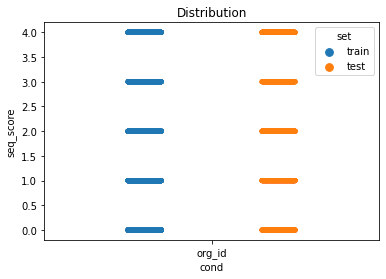


_____Split 3____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


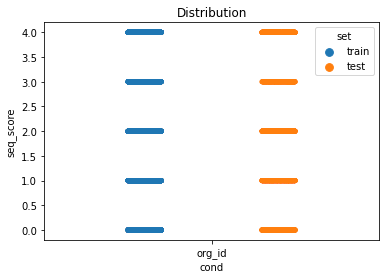


_____Split 4____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


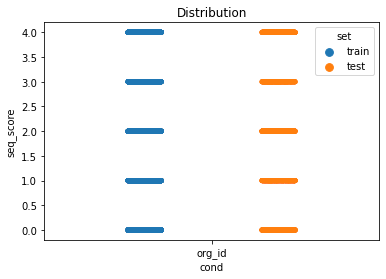

In [52]:
for i, (train_idxs, test_idxs) in enumerate(skf.split(all_300bp_cds_df, all_300bp_cds_df['org_id'])):
    print(f"_____Split {i}____")
    train_df = all_300bp_cds_df.iloc[train_idxs]
    test_df = all_300bp_cds_df.iloc[test_idxs]
    
    score_col = "org_id"

    v.view_train_test_dist(train_df, test_df,[score_col],id_col='locus_tag')
    
    print("")
    
    train_df.to_csv(f'data/5org_cds_cls_splits/cv{i}_train.tsv',index=False,sep='\t')
    test_df.to_csv(f'data/5org_cds_cls_splits/cv{i}_test.tsv',index=False,sep='\t')

These dataframes are now prepped and ready to use in other pre-training tasks!
* `data/5org_upstream_regions.tsv`
* `data/5org_cds_regions.tsv`
* `data/5org_cds_regions_300bp.tsv`

In [48]:
df = pd.read_csv('data/5org_cds_regions_300bp.tsv',sep='\t')
df

,CDS_seq,chunk_id,extended?,locus_tag,org_id,org_name,shuffled_seq,strand,type
0,ATGAGTGCACTCTGGAACAACTGTCTCGCTAAACTTGAAAATGAAA...,0.0,0.0,EQU24_RS00005,0.0,5G,CATTGCAGCGGAGTTAAAGGACACTGCCCTGTAGTACAGTCACCCG...,1.0,CDS
1,AACTTTCTTAATAGAGCATTCATTTTCGATAACTTTGTCGAAGGTA...,1.0,0.0,EQU24_RS00005,0.0,5G,AACTTTAATATATTCCAATCTATCTCACGCTAAGGGGGAGAGGGAT...,1.0,CDS
2,GATACATTGCTGATTGACGATATTCAATTCTTTGCCGGCAAGGAAC...,2.0,0.0,EQU24_RS00005,0.0,5G,TTTATCTACGCCTAGTCAACCCCAACGACTAACTTCCTGGGGGGCT...,1.0,CDS
3,CCTTCGAATGTACGAGATCTCGAAGGCGCATTACGACGAGTTATTG...,3.0,0.0,EQU24_RS00005,0.0,5G,CAGCAGTGATAAAAGCATATCAGAGAGCACCTGGTCGGTGTTTCGC...,1.0,CDS
4,ATGAAATATATTATTAATAGAGAACAGCTATTGGTTCCATTGCAGC...,0.0,0.0,EQU24_RS00010,0.0,5G,CCCCACAGAATAGGAACATTATTTAGCCATATTTAATATCATTCCG...,1.0,CDS
...,...,...,...,...,...,...,...,...,...
51758,ATGTTAATAAAAAATGTAAGACTTAGAAATAAAGATGGAATATATG...,0.0,0.0,CAETHG_RS20455,4.0,cauto,TACCCGTTGAATACGAACCGTATTTCGTTTCACGAAAAGAGGAACA...,1.0,CDS
51759,CTTAAATGGCAGATAGCAAATGGAATACAGTATGTAAGAACACATG...,1.0,0.0,CAETHG_RS20455,4.0,cauto,AAATTAATTGCTAACTTTACAATGGCTTAATAATTAAGAGGGGAAG...,1.0,CDS
51760,GATAAACTGGTTGATGTCCACTGTGATGAAATTGATGATGAGCAGT...,2.0,0.0,CAETHG_RS20455,4.0,cauto,AACTTCGTTCGACCAGGGAATAACAAGTATACGAGTAAGTTTGTAG...,1.0,CDS
51761,GTATGTTTTGGACACGATGATATATGTGATCCATGGTATCCAATGG...,3.0,0.0,CAETHG_RS20455,4.0,cauto,GTTTTCAAGGATAACCCTTTTAATGATATAAGGGACGAGGAATACT...,1.0,CDS


In [49]:
# make sure that nothing that was extended has multiple chunks to it!
sum(df[df['extended?']==1.0]['chunk_id'])

0.0

In [50]:
df['type'].value_counts()

CDS      50894
rRNA       451
tRNA       330
ncRNA       85
tmRNA        3
Name: type, dtype: int64

# Save only 5G seqs to df

In [53]:
cds_5G = df[df['org_name']=='5G'] 
cds_5G

,CDS_seq,chunk_id,extended?,locus_tag,org_id,org_name,shuffled_seq,strand,type
0,ATGAGTGCACTCTGGAACAACTGTCTCGCTAAACTTGAAAATGAAA...,0.0,0.0,EQU24_RS00005,0.0,5G,CATTGCAGCGGAGTTAAAGGACACTGCCCTGTAGTACAGTCACCCG...,1.0,CDS
1,AACTTTCTTAATAGAGCATTCATTTTCGATAACTTTGTCGAAGGTA...,1.0,0.0,EQU24_RS00005,0.0,5G,AACTTTAATATATTCCAATCTATCTCACGCTAAGGGGGAGAGGGAT...,1.0,CDS
2,GATACATTGCTGATTGACGATATTCAATTCTTTGCCGGCAAGGAAC...,2.0,0.0,EQU24_RS00005,0.0,5G,TTTATCTACGCCTAGTCAACCCCAACGACTAACTTCCTGGGGGGCT...,1.0,CDS
3,CCTTCGAATGTACGAGATCTCGAAGGCGCATTACGACGAGTTATTG...,3.0,0.0,EQU24_RS00005,0.0,5G,CAGCAGTGATAAAAGCATATCAGAGAGCACCTGGTCGGTGTTTCGC...,1.0,CDS
4,ATGAAATATATTATTAATAGAGAACAGCTATTGGTTCCATTGCAGC...,0.0,0.0,EQU24_RS00010,0.0,5G,CCCCACAGAATAGGAACATTATTTAGCCATATTTAATATCATTCCG...,1.0,CDS
...,...,...,...,...,...,...,...,...,...
12122,TTTTATACCAAAGACCTTAAAGATTGGCGTTATGTAATCGGTTCCT...,3.0,0.0,EQU24_RS22140,0.0,5G,TCGCAGTTTTGATGTCGATCACCTATATAGTATTTGCTGTATCCTT...,-1.0,CDS
12123,CAAACCAGTTTTCGTTCGATGGCGAAAATGCGCAAGATTCAGCCGC...,4.0,0.0,EQU24_RS22140,0.0,5G,GTCTTCCATCACGTCATATCTTGGGTTGTTTGAATGGTGTTATAAT...,-1.0,CDS
12124,ATGCGAGTCTTACTCATAGCAATTATAAAGTTATACCAATACTTTA...,0.0,1.0,EQU24_RS22145,0.0,5G,CGGACAAGAAATGCAACGGACTATTTTTTACTCAGTCACCCCCCAT...,-1.0,CDS
12125,TTGACGAACAAGGTATTTAGTTTCCCGCCGCAGTTAAGGTTAAGGA...,0.0,0.0,EQU24_RS22150,0.0,5G,AACGAGAAGGATAAGTTTACGATACTACAAATATACTCTGGGGACA...,-1.0,CDS


In [54]:
cds_5G.to_csv('data/5G_cds_regions_300bp.tsv')

# Combine 5G upstream and CDS df

In [55]:
cds_5G['seq_type'] = 'orf'
cds_5G['seq_type_id'] = 0

/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
ups_5G = final_df[final_df['org'] == '5G']
ups_5G['type'] = 'upstream'
ups_5G['seq_type'] = 'upstream'
ups_5G['seq_type_id'] = 1
ups_5G['extended?'] = 0.0 # False
ups_5G['chunk_id'] = 0.0 # first chunk

/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [61]:
cds_subdf = cds_5G[['CDS_seq','locus_tag','type','extended?','chunk_id','seq_type','seq_type_id','shuffled_seq']]
cds_subdf = cds_subdf.rename(columns={'CDS_seq':'seq'})
cds_subdf

,seq,locus_tag,type,extended?,chunk_id,seq_type,seq_type_id,shuffled_seq
0,ATGAGTGCACTCTGGAACAACTGTCTCGCTAAACTTGAAAATGAAA...,EQU24_RS00005,CDS,0.0,0.0,orf,0,CATTGCAGCGGAGTTAAAGGACACTGCCCTGTAGTACAGTCACCCG...
1,AACTTTCTTAATAGAGCATTCATTTTCGATAACTTTGTCGAAGGTA...,EQU24_RS00005,CDS,0.0,1.0,orf,0,AACTTTAATATATTCCAATCTATCTCACGCTAAGGGGGAGAGGGAT...
2,GATACATTGCTGATTGACGATATTCAATTCTTTGCCGGCAAGGAAC...,EQU24_RS00005,CDS,0.0,2.0,orf,0,TTTATCTACGCCTAGTCAACCCCAACGACTAACTTCCTGGGGGGCT...
3,CCTTCGAATGTACGAGATCTCGAAGGCGCATTACGACGAGTTATTG...,EQU24_RS00005,CDS,0.0,3.0,orf,0,CAGCAGTGATAAAAGCATATCAGAGAGCACCTGGTCGGTGTTTCGC...
4,ATGAAATATATTATTAATAGAGAACAGCTATTGGTTCCATTGCAGC...,EQU24_RS00010,CDS,0.0,0.0,orf,0,CCCCACAGAATAGGAACATTATTTAGCCATATTTAATATCATTCCG...
...,...,...,...,...,...,...,...,...
12122,TTTTATACCAAAGACCTTAAAGATTGGCGTTATGTAATCGGTTCCT...,EQU24_RS22140,CDS,0.0,3.0,orf,0,TCGCAGTTTTGATGTCGATCACCTATATAGTATTTGCTGTATCCTT...
12123,CAAACCAGTTTTCGTTCGATGGCGAAAATGCGCAAGATTCAGCCGC...,EQU24_RS22140,CDS,0.0,4.0,orf,0,GTCTTCCATCACGTCATATCTTGGGTTGTTTGAATGGTGTTATAAT...
12124,ATGCGAGTCTTACTCATAGCAATTATAAAGTTATACCAATACTTTA...,EQU24_RS22145,CDS,1.0,0.0,orf,0,CGGACAAGAAATGCAACGGACTATTTTTTACTCAGTCACCCCCCAT...
12125,TTGACGAACAAGGTATTTAGTTTCCCGCCGCAGTTAAGGTTAAGGA...,EQU24_RS22150,CDS,0.0,0.0,orf,0,AACGAGAAGGATAAGTTTACGATACTACAAATATACTCTGGGGACA...


In [62]:
ups_subdf = ups_5G[['upstream_region','locus_tag','type','extended?','chunk_id','seq_type','seq_type_id','shuffled_seq']]
ups_subdf = ups_subdf.rename(columns={'upstream_region':'seq'})
ups_subdf

,seq,locus_tag,type,extended?,chunk_id,seq_type,seq_type_id,shuffled_seq
0,ACTGTTAGCTTGGCACGGCCCTTGGCTCTGCGGGCGTTAAGGACTT...,EQU24_RS00005,upstream,0.0,0.0,upstream,1,GTCTTCTGAGTGTTATAAGCTGGAGTTCTTCAGTGTTGTGTACCCA...
1,GTGGACGCGATCACACCACGGTTATTAATGCTTGTAAACGCATTGC...,EQU24_RS00010,upstream,0.0,0.0,upstream,1,TTGATGTGTATATTGGACCTAACTACGCAAACCTTTGTCCTTGTAA...
2,TTGCGAAGAGGGGCGGTTTCTCGTCCGACAGGCGTCGGCGGCAAGG...,EQU24_RS00015,upstream,0.0,0.0,upstream,1,TAGGCAGACTTGGTAAGGTTCGTATTAGATGTCAAAGTAAGAGGTA...
3,ATTGTTAGTTCTATGTTTAAAGCTTGCGCAAGTACAATTATTGTCG...,EQU24_RS00020,upstream,0.0,0.0,upstream,1,TTAACCTCGGGGTCTTTCAGATGAGCCAGAGTGGATGATAAGCTAG...
4,GTATAAACCATGAAAGTCAGCCTATTTCGAAGATACCGACACCCTA...,EQU24_RS00035,upstream,0.0,0.0,upstream,1,GGGACAGAACCTATGAGTCCTCTAGGATTAATGGACTTTGCCCCGA...
...,...,...,...,...,...,...,...,...
4228,GAAAATAACCCGCGAATTAACACCAAACCGAGACCCAAACAACAAA...,EQU24_RS22130,upstream,0.0,0.0,upstream,1,AAAAACAAAAAGACTAGGAGAATAGATTCACACCAGACGCACGGTA...
4229,GAAACCGTTGAATTGCGTCAAGCTCCGTTTGCCTTGTGGATGCAGG...,EQU24_RS22135,upstream,0.0,0.0,upstream,1,CTATTCTGCACGGAGGTTACCATTTTCAGAGTTGGGTTCTAAAGCT...
4230,AAAGATGCACTCAATGCATCACCGGAACAATTACAAAAGTCATTGG...,EQU24_RS22140,upstream,0.0,0.0,upstream,1,CGCCGAAGCTGTCGGTGTAATGCTGAAGCCATTATTGTAGGCGATA...
4231,CTTCTGAATATAAAAAAGTCTTTACCGGACCGGTAAAATCGAGTGA...,EQU24_RS22145,upstream,0.0,0.0,upstream,1,GCCGAAGCCAGCAAGACTATACTTACCTTATAGGGTGGGGGGAATG...


In [63]:
all_5G_seq_df = pd.concat([cds_subdf,ups_subdf])
all_5G_seq_df

,seq,locus_tag,type,extended?,chunk_id,seq_type,seq_type_id,shuffled_seq
0,ATGAGTGCACTCTGGAACAACTGTCTCGCTAAACTTGAAAATGAAA...,EQU24_RS00005,CDS,0.0,0.0,orf,0,CATTGCAGCGGAGTTAAAGGACACTGCCCTGTAGTACAGTCACCCG...
1,AACTTTCTTAATAGAGCATTCATTTTCGATAACTTTGTCGAAGGTA...,EQU24_RS00005,CDS,0.0,1.0,orf,0,AACTTTAATATATTCCAATCTATCTCACGCTAAGGGGGAGAGGGAT...
2,GATACATTGCTGATTGACGATATTCAATTCTTTGCCGGCAAGGAAC...,EQU24_RS00005,CDS,0.0,2.0,orf,0,TTTATCTACGCCTAGTCAACCCCAACGACTAACTTCCTGGGGGGCT...
3,CCTTCGAATGTACGAGATCTCGAAGGCGCATTACGACGAGTTATTG...,EQU24_RS00005,CDS,0.0,3.0,orf,0,CAGCAGTGATAAAAGCATATCAGAGAGCACCTGGTCGGTGTTTCGC...
4,ATGAAATATATTATTAATAGAGAACAGCTATTGGTTCCATTGCAGC...,EQU24_RS00010,CDS,0.0,0.0,orf,0,CCCCACAGAATAGGAACATTATTTAGCCATATTTAATATCATTCCG...
...,...,...,...,...,...,...,...,...
4228,GAAAATAACCCGCGAATTAACACCAAACCGAGACCCAAACAACAAA...,EQU24_RS22130,upstream,0.0,0.0,upstream,1,AAAAACAAAAAGACTAGGAGAATAGATTCACACCAGACGCACGGTA...
4229,GAAACCGTTGAATTGCGTCAAGCTCCGTTTGCCTTGTGGATGCAGG...,EQU24_RS22135,upstream,0.0,0.0,upstream,1,CTATTCTGCACGGAGGTTACCATTTTCAGAGTTGGGTTCTAAAGCT...
4230,AAAGATGCACTCAATGCATCACCGGAACAATTACAAAAGTCATTGG...,EQU24_RS22140,upstream,0.0,0.0,upstream,1,CGCCGAAGCTGTCGGTGTAATGCTGAAGCCATTATTGTAGGCGATA...
4231,CTTCTGAATATAAAAAAGTCTTTACCGGACCGGTAAAATCGAGTGA...,EQU24_RS22145,upstream,0.0,0.0,upstream,1,GCCGAAGCCAGCAAGACTATACTTACCTTATAGGGTGGGGGGAATG...


In [64]:
all_5G_seq_df['seq_type'].value_counts()

orf         12127
upstream     4233
Name: seq_type, dtype: int64

In [65]:
all_5G_seq_df.to_csv('data/5G_all_seq_regions_300bp.tsv',sep='\t',index=False)

### save stratified splits of these too

_____Split 0____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


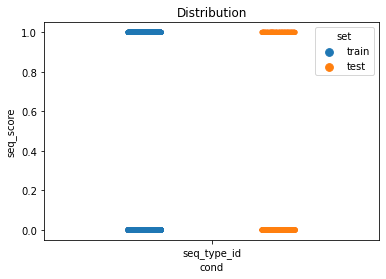


_____Split 1____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


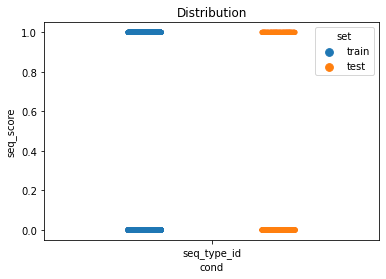


_____Split 2____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


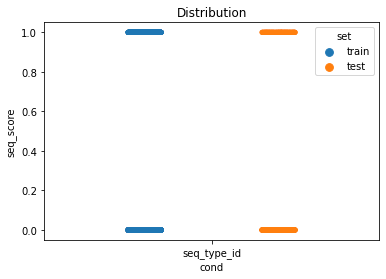


_____Split 3____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


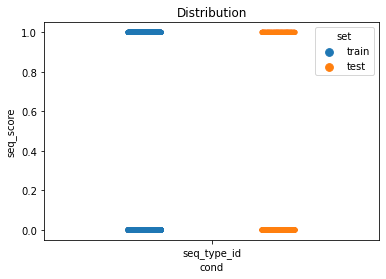


_____Split 4____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


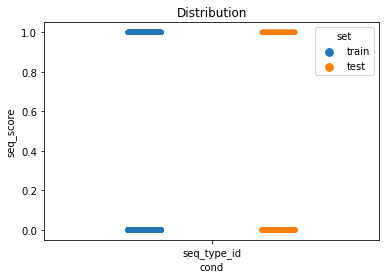

In [67]:
for i, (train_idxs, test_idxs) in enumerate(skf.split(all_5G_seq_df, all_5G_seq_df['seq_type_id'])):
    print(f"_____Split {i}____")
    train_df = all_5G_seq_df.iloc[train_idxs]
    test_df = all_5G_seq_df.iloc[test_idxs]
    
    score_col = "seq_type_id"

    v.view_train_test_dist(train_df, test_df,[score_col],id_col='locus_tag')
    
    print("")
    
    train_df.to_csv(f'data/5g_ups_cds_cls_splits/cv{i}_train.tsv',index=False,sep='\t')
    test_df.to_csv(f'data/5g_ups_cds_cls_splits/cv{i}_test.tsv',index=False,sep='\t')